In [60]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
% matplotlib inline

In [2]:
path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe
#path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [45]:
collisions = pd.read_pickle(path+'collisions.pkl')

In [46]:
collisions['missing_latlong']= (pd.isnull(collisions.LATITUDE) | pd.isnull(collisions.LONGITUDE)).astype('int')

In [37]:
collisions_missing=collisions[collisions['missing_latlong']==1]
collisions_not_missing=collisions[collisions['missing_latlong']==0]

In [42]:
print(len(collisions))
print(len(collisions_missing))
print(len(collisions_not_missing))

994499
201648
792851


In [43]:
collisions_missing.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY,DAY_OF_WEEK,lat_bin,long_bin,missing_latlong
count,29487.000000,0.0,0.0,201648.000000,201648.000000,201648.000000,201648.000000,201648.000000,201648.000000,201648.000000,201648.000000,2.016480e+05,201648.000000,0.0,0.0,201648.0
mean,10853.196426,NaN,NaN,0.255172,0.001374,0.046179,0.000779,0.020933,0.000084,0.231711,0.000516,2.509300e+06,2.913081,NaN,NaN,1.0
std,557.405147,NaN,NaN,0.668688,0.038353,0.259834,0.028421,0.173652,0.009181,0.794175,0.024389,1.381340e+06,1.936609,NaN,NaN,0.0
min,10000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+01,0.000000,NaN,NaN,1.0
25%,10309.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000064e+06,1.000000,NaN,NaN,1.0
50%,11207.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.273556e+06,3.000000,NaN,NaN,1.0
75%,11355.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.501677e+06,5.000000,NaN,NaN,1.0
max,11697.000000,NaN,NaN,16.000000,3.000000,8.000000,2.000000,5.000000,1.000000,32.000000,3.000000,3.631491e+06,6.000000,NaN,NaN,1.0


In [44]:
collisions_not_missing.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY,DAY_OF_WEEK,lat_bin,long_bin,missing_latlong
count,702812.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,792851.000000,7.928510e+05,792851.000000,792851.000000,792851.000000,792851.0
mean,10806.769766,40.721841,-73.922469,0.255096,0.001174,0.056653,0.000661,0.020899,0.000073,0.182612,0.000448,1.945638e+06,2.904204,40.720341,-73.923963,0.0
std,567.040581,0.232609,0.594150,0.651810,0.036181,0.248089,0.025895,0.145729,0.008553,0.634531,0.024265,1.528130e+06,1.944548,0.232602,0.594159,0.0
min,10000.000000,0.000000,-201.359990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+01,0.000000,0.000000,-201.360000,0.0
25%,10075.000000,40.669061,-73.979227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.216295e+05,1.000000,40.668000,-73.980000,0.0
50%,11204.000000,40.723423,-73.933811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.033589e+06,3.000000,40.722000,-73.935000,0.0
75%,11236.000000,40.765771,-73.869760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.342113e+06,5.000000,40.764000,-73.872000,0.0
max,11697.000000,40.912884,0.000000,43.000000,5.000000,15.000000,2.000000,6.000000,1.000000,43.000000,5.000000,3.631696e+06,6.000000,40.911000,0.000000,0.0


In [47]:
collisions.columns

Index(['DATE_TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'DAY_OF_WEEK', 'lat_bin', 'long_bin',
       'missing_latlong'],
      dtype='object')

In [78]:
column_list = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED','DAY_OF_WEEK']

In [79]:
for column_name in column_list:
    result = ttest_ind(collisions_missing[column_name],collisions_not_missing[column_name],equal_var=False)
    print(column_name, result.pvalue, result.pvalue<(0.05/len(column_list)))

NUMBER OF PERSONS INJURED 0.963213669558 False
NUMBER OF PERSONS KILLED 0.0349798613582 False
NUMBER OF PEDESTRIANS INJURED 9.23190276076e-60 True
NUMBER OF PEDESTRIANS KILLED 0.0911220937201 False
NUMBER OF CYCLIST INJURED 0.936877659209 False
NUMBER OF CYCLIST KILLED 0.621552295585 False
NUMBER OF MOTORIST INJURED 4.80660431301e-146 True
NUMBER OF MOTORIST KILLED 0.263128487417 False
DAY_OF_WEEK 0.0662998912361 False


In [83]:
collisions['month']=collisions.DATE_TIME.dt.month
collisions['year']=collisions.DATE_TIME.dt.year

In [89]:
missing_rates_by_month = collisions.groupby(['year','month'])['missing_latlong'].mean()
collisions_by_month = collisions.groupby(['year','month'])['missing_latlong'].count()

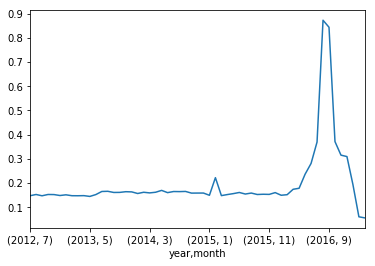

In [92]:
missing_rates_by_month.plot()

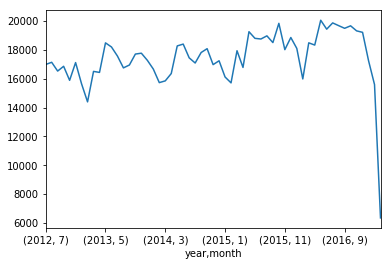

In [91]:
collisions_by_month.plot()